# Black Friday Dataset EDA and Feature Engineering 
Cleaning and preparing data for model training

# Problem Statement

A retail company "ABC Private Limited" wants to understand the customer purchase behaviour (specifically, purchase amount) against products of different 
categories. They have shared purchase summary of various customer for selected high volume product from last month. The dataset also contain customer 
demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount
from the last month.

Now, they want to build a model to predict the purchase amount of customer against products which will help them to create personlized offer for customer
against profucts

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [152]:
# Importing dataset

df_train = pd.read_csv('black_friday_train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [153]:
df_test = pd.read_csv('black_friday_test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [154]:
# concat train and test data

df = pd.concat([df_train, df_test])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [156]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [157]:
df.drop(['User_ID'], axis=1, inplace=True)

In [158]:
df['Gender'] = df['Gender'].map({'F':0, 'M':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [159]:
# Handle categorical feature Age

df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [160]:
df['Age'] = df['Age'].map({'0-17':1, '18-25':2, '26-35':3,'36-45':4, '46-50':5, '51-55':6, '55+':7})

### Second Technique
# from sklearn import preprocessing

# label_encoder = preprocessing.LabelEncoder()

# df['Age'] = label_encoder.fit_transform(df['Age'])

# df['Age'].unique()

In [161]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [162]:
df_city = pd.get_dummies(df['City_Category'], drop_first=True)

In [163]:
df_city.head()

,B,C
0,False,False
1,False,False
2,False,False
3,False,False
4,False,True


In [164]:
df = pd.concat([df, df_city], axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,False,False
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,False,False
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,False,False
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,False,True


In [165]:
### Drop city_category

df.drop('City_Category', axis=1, inplace=True)

In [166]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,False,False
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,False,False
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,False,False
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,False,True


In [167]:
### Missing values

df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [168]:
df['Product_Category_2'].mode()[0]

8.0

In [169]:
### Replacing the missing  values
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [170]:
df['Product_Category_2'].isnull().sum()

0

In [171]:
# replace missing value for product_category_3

df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [172]:
df['Product_Category_3'].isnull().sum()

0

In [173]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,False,False
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,False,False
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,False,False
4,P00285442,1,7,16,4+,0,8,8.0,16.0,7969.0,False,True


In [174]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [175]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+', '')

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  bool   
 11  C                           783667 non-null  bool   
dtypes: bool(2), float64(3), int64(5), object(2)
memory usage: 67.3+ MB


In [177]:
### Convert object into integer.

df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

In [178]:
df['B'] = df['B'].astype(int)
df['C'] = df['C'].astype(int)


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 68.8+ MB


# Visualization

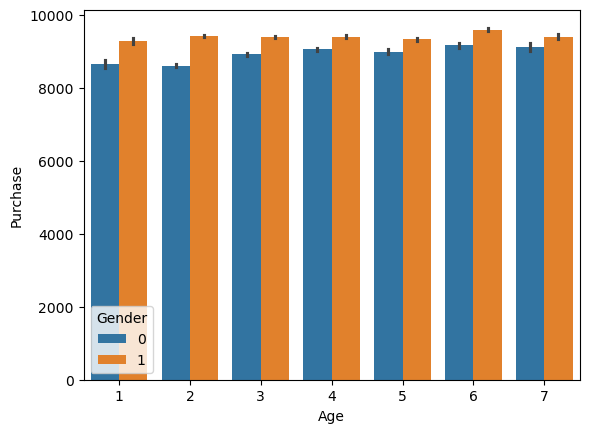

In [180]:
sns.barplot(x='Age', y='Purchase', hue='Gender', data=df)
plt.show()

In [181]:
### Purchasing of men is higher than women

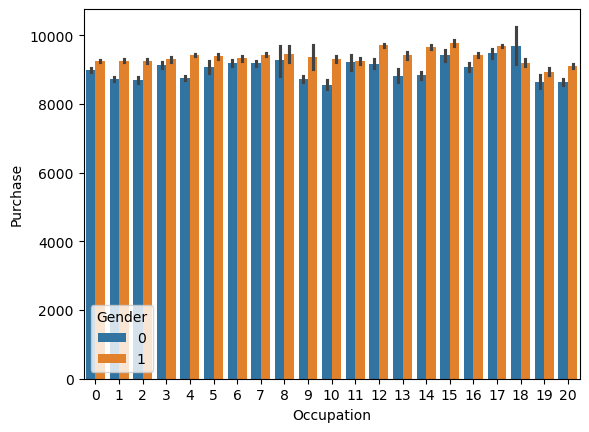

In [182]:
# Visualization of purchasing with occupation

sns.barplot(x='Occupation', y='Purchase',hue='Gender', data=df)
plt.show()

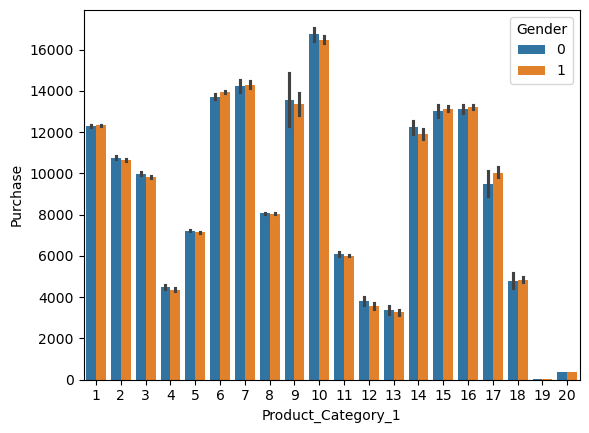

In [183]:
sns.barplot(x='Product_Category_1', y='Purchase', hue='Gender', data=df)
plt.show()

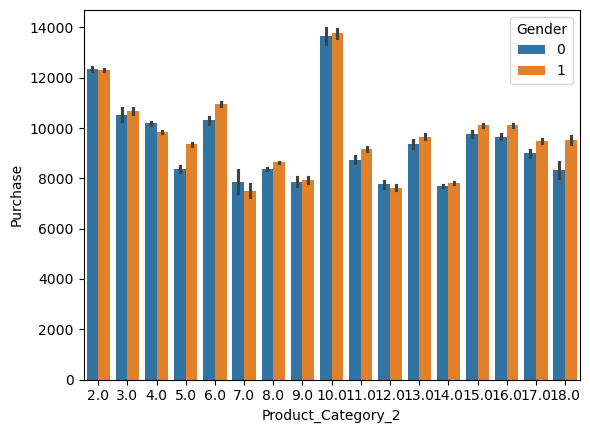

In [184]:
sns.barplot(x='Product_Category_2', y='Purchase', hue='Gender', data=df)
plt.show()

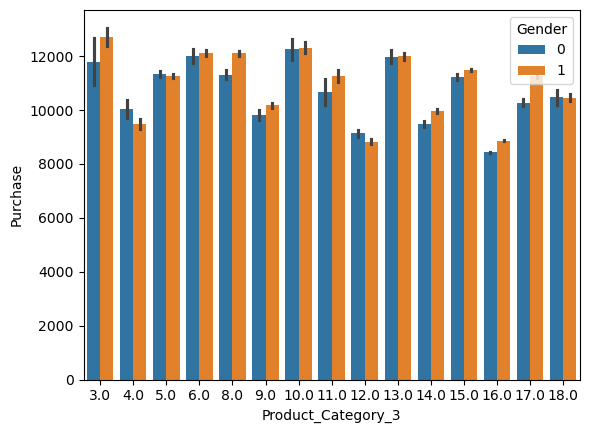

In [185]:
sns.barplot(x='Product_Category_3', y='Purchase', hue='Gender', data=df)
plt.show()

In [186]:
df_test = df[df['Purchase'].isnull()]

In [187]:
df_train = df[~df['Purchase'].isnull()]

# Feature Scaling

In [204]:
x = df_train.drop('Purchase', axis=1)
x.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,0,1


In [205]:
x.shape

(550068, 11)

In [206]:
y = df_train['Purchase']
y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
550063      368.0
550064      371.0
550065      137.0
550066      365.0
550067      490.0
Name: Purchase, Length: 550068, dtype: float64

In [207]:
y.shape

(550068,)

In [208]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [210]:
x_train.drop('Product_ID', axis=1, inplace=True)
x_test.drop('Product_ID', axis=1, inplace=True)

In [211]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)